## Project Name:-Breast Cancer Detection


## Using Machine Learning To Predict Diagnosis of a Breast Cancer

## 1. Identify the problem
Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

## 1.1 Expected outcome
Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

a) 1= Malignant (Cancerous) - Present
b) 0= Benign (Not Cancerous) -Absent

## 1.2 Objective
Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning this is a classification problem.

Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.

## 1.3 Identify data sources
The Breast Cancer datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.
The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

## Import Libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.naive_bayes import GaussianNB


## Load Dataset

In [105]:
df = pd.read_csv(r'C:\Users\AK\Desktop\file\breast cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [98]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [107]:
df.shape

(569, 33)

In [108]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

##  data preprocessing

In [109]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In the above data the unnamed:32 column has significant missing value(569).we have to remove the unnmaed:32 column

In [110]:
df = df.drop("id", axis=1)

In [111]:
# Check if the column exists before dropping it
if "Unnamed: 32" in df.columns:
    df = df.drop("Unnamed: 32", axis=1)


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [113]:
# count of malignant and benignate
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

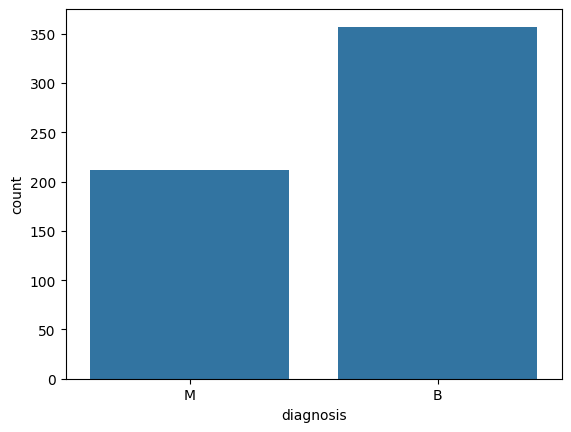

In [114]:
sns.countplot(df, x="diagnosis")
plt.show()

In [115]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

 We need to perform label encoder diagnosis column bcoz all the columns are in numerical except diagnosis column.

In [116]:
from sklearn.preprocessing import LabelEncoder

# Convert 'diagnosis' column to categorical type if needed
df['diagnosis'] = df['diagnosis'].astype('category')

# Initialize LabelEncoder
le = LabelEncoder()

# Perform label encoding
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Verify unique values and their encoded counterparts
print(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [53]:
 #manula label encoding 
# df['diagnosis'] = df['diagnosis'].map({"M":1, "B":0})

In [117]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualize the data

In [118]:
data_mean=df.iloc[:,1:11]

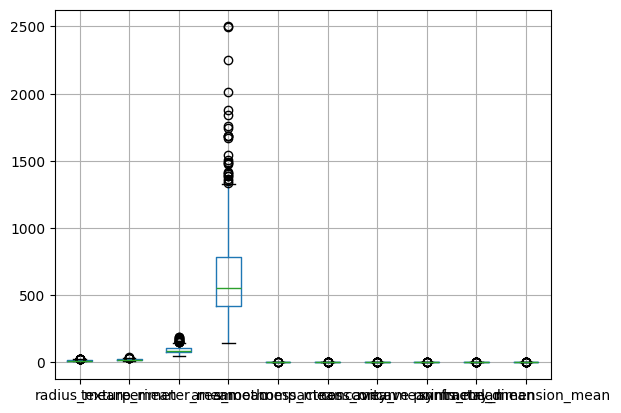

In [119]:
data_mean.boxplot()
plt.show()

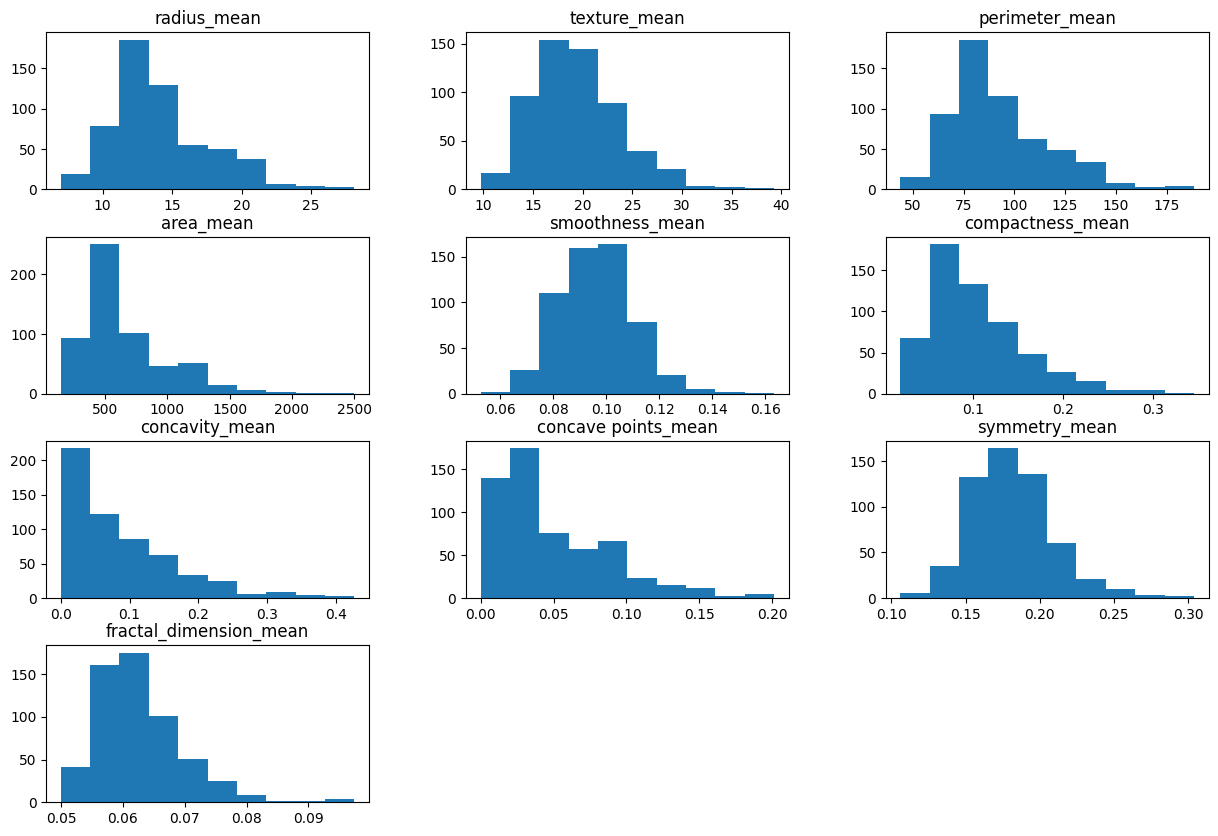

In [120]:
#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)
plt.show()

The above figure visualizes the distribution outcomes of various parameters.The expected bell shaped curve looks  like lopsided or one sided.

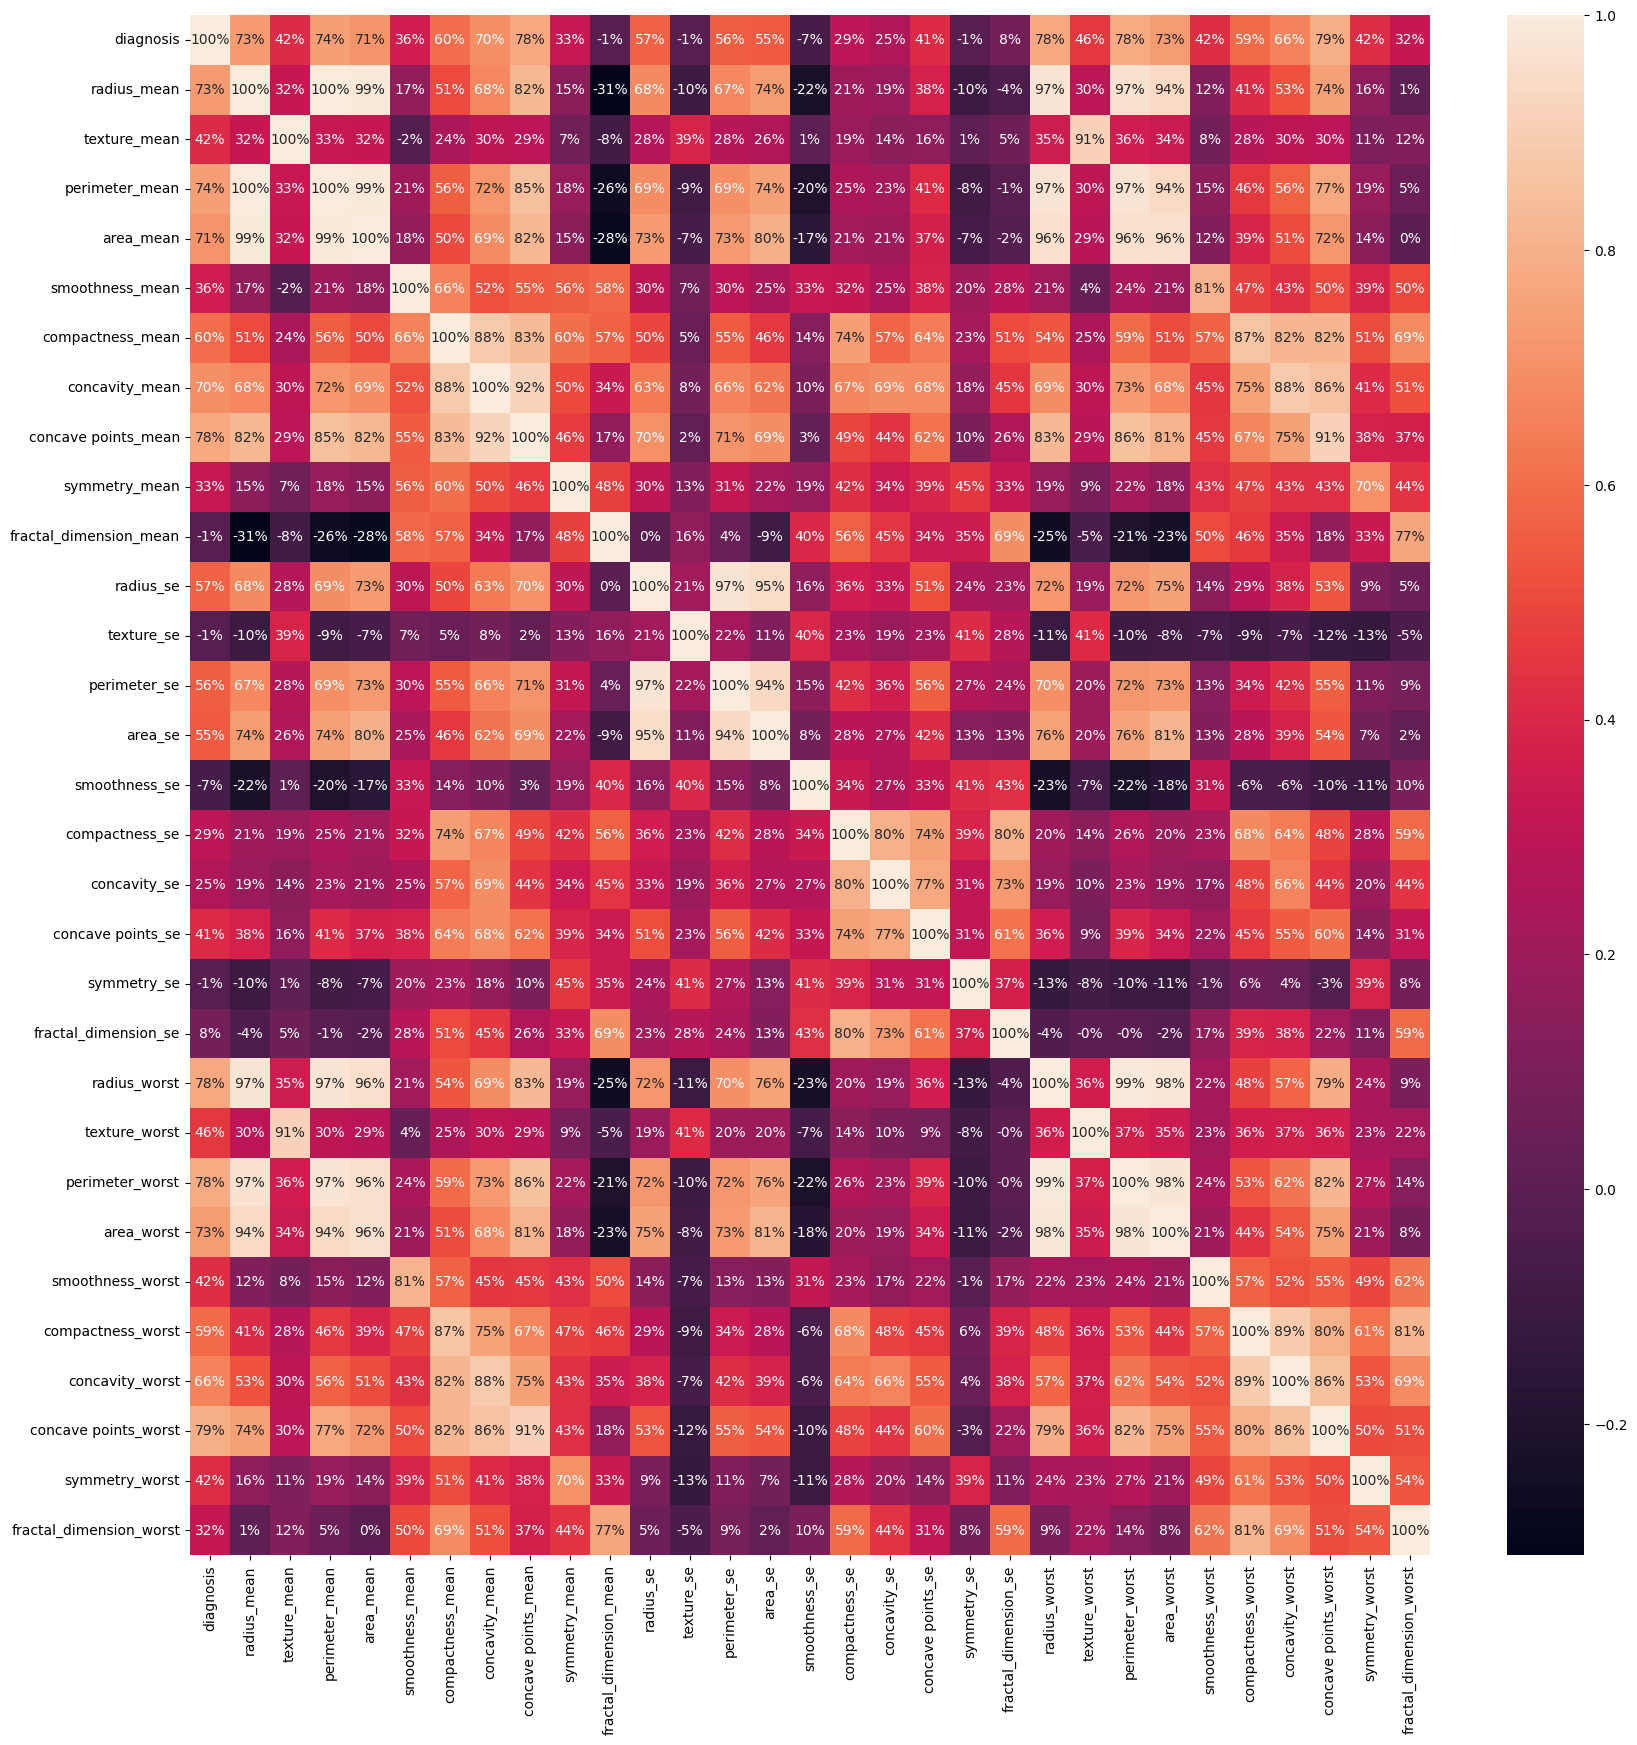

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming df is your DataFrame
plt.figure(figsize=(20, 20))  # Creating a new figure
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()  # Show the plot

from the above heat map it is clear that the light color shows the high correlation and dark color shows the low correlation

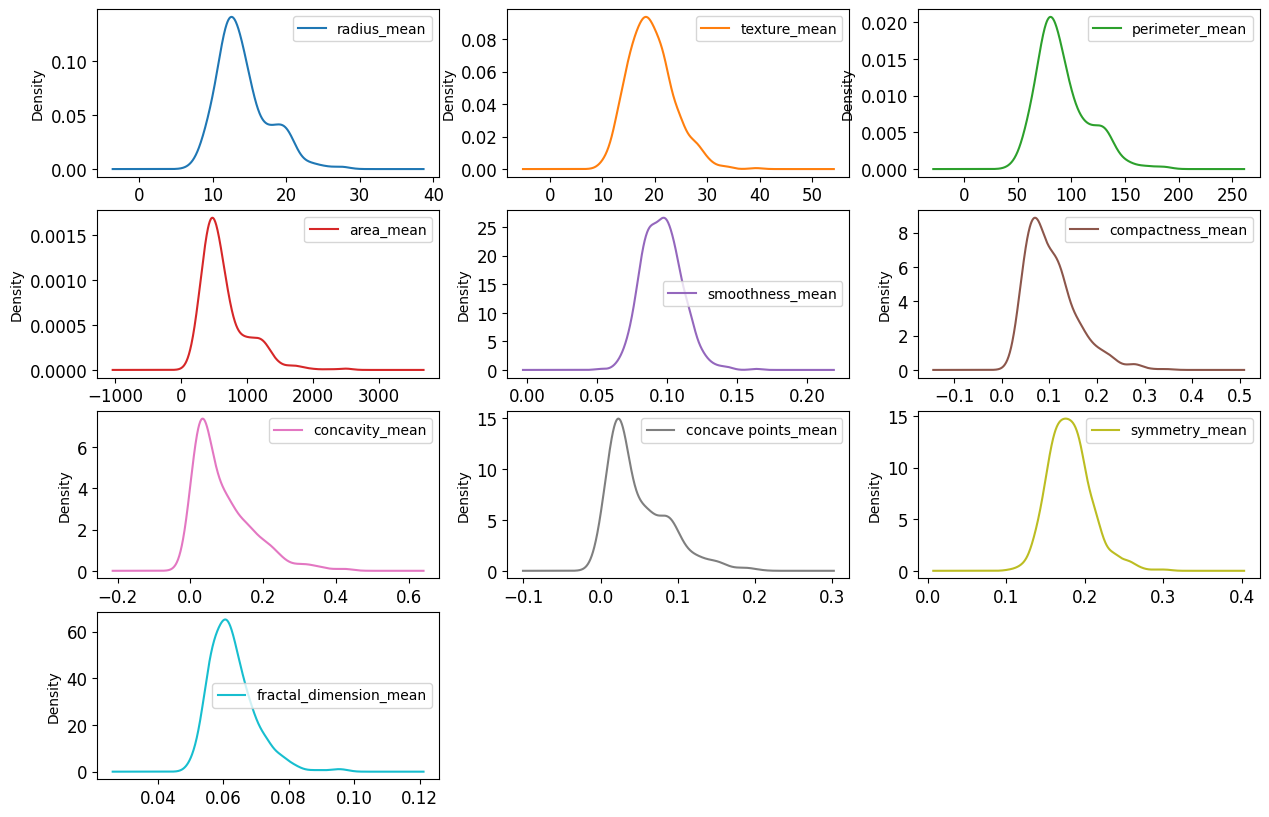

In [122]:
import matplotlib.pyplot as plt
# Density Plots
data_mean.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, sharey=False, fontsize=12, figsize=(15, 10),grid=False)
plt.show()

the above graph depicts the probability density function of the continuous or non-parametric data variables. we can plot for the univariate or multiple variables altogether.In the above some graphs there was some distortion in right side though it is not normally distributed 

## Splitting the data & Normalization

In [123]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis'].values


In [124]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [126]:
df.shape

(569, 31)

In [127]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

## Model Building

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [130]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

## Logistic Regression

In [131]:
# Logistic Regression

# train the model
reg = LogisticRegression()
reg.fit(X_train_scale,y_train)

# prediction on test data 
y_pred = reg.predict(X_test_scale)

# evalation 
print("Confusion Matri")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------")
print("Accuracy : ")
print(accuracy_score(y_test, y_pred))
print("-----------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Confusion Matri
[[71  0]
 [ 2 41]]
-----------------------------------------------
Accuracy : 
0.9824561403508771
-----------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## SVM

In [132]:
from sklearn.svm import SVC
# Logistic Regression

# train the model
svc = SVC()
svc.fit(X_train_scale,y_train)

# prediction on test data 
y_pred = svc.predict(X_test_scale)

# evalation 
print("Confusion Matri")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------")
print("Accuracy : ")
print(accuracy_score(y_test, y_pred))
print("-----------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test, y_pred))


Confusion Matri
[[70  1]
 [ 2 41]]
-----------------------------------------------
Accuracy : 
0.9736842105263158
-----------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Naive Bayes

In [133]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
print(" Naive Bayes accuracy : {:.2f}%".format(nb.score(X_test,y_test)*100))

 Naive Bayes accuracy : 97.37%


## Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,random_state=1)
rf.fit(X_train,y_train)
print("Random Forest Classifier accuracy : {:.2f}%".format(rf.score(X_test,y_test)*100))

Random Forest Classifier accuracy : 96.49%


## Xgboost

In [136]:
import xgboost
xg = xgboost.XGBClassifier()
xg.fit(X_train,y_train)
print("XGboost accuracy : {:.2f}%".format(xg.score(X_test,y_test)*100))

XGboost accuracy : 95.61%


Logistic Regression achieved the highest accuracy of 98%, followed closely by Naive Bayes with 97.37%. Support Vector Machine (SVM) also performed well with an accuracy of 97.36%.